In [1]:
#Downloading dataset from Kaggle

!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
 99% 1.97G/1.98G [00:18<00:00, 115MB/s]
100% 1.98G/1.98G [00:18<00:00, 115MB/s]


In [2]:
#Extracting the zip file


import zipfile
zip_ref = zipfile.ZipFile('/content/fruit-and-vegetable-image-recognition.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
#Import necessary libraries

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import PIL
import pathlib
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import tensorflow_datasets as tfds


In [4]:
#loading train dataset with batches of 10 from the subdirectories


train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=20,
    image_size=(256,256)
)
class_names = train_ds.class_names

Found 3115 files belonging to 36 classes.


In [5]:
#loading test dataset with batches of 10 from the subdirectories


validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=10,
    image_size=(256,256),
    seed = 123,
    shuffle=False
)

Found 359 files belonging to 36 classes.


In [6]:
#Tune the value dynamically


AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(buffer_size=32).prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().shuffle(buffer_size=32).prefetch(buffer_size=AUTOTUNE)

In [7]:
#Identifying the classnames

print(class_names)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [8]:
len(class_names)


36

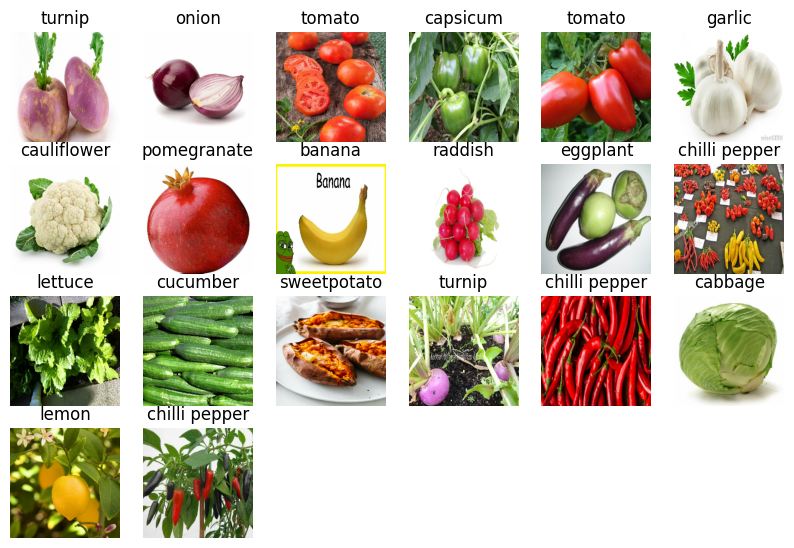

In [11]:
#Plotting images of fruits and vegetables

plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
  # Iterate over the number of images in the batch
  for i in range(images.shape[0]):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [12]:
num_classes = len(class_names)
#augmenting the image view
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.5),
])

# Create an instance of the Sequential class
model = Sequential([
  layers.Rescaling(1./255, input_shape=(256, 256, 3)),
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),#convolution of 256*256images with 16 3*3 filters,with padding
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),#convolution of 256*256images with 32 3*3 filters,with padding
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),#convolution of 256*256images with 64 3*3 filters,with padding
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),#convolution of 256*256images with 128 3*3 filters,with padding
  layers.MaxPooling2D(),
  layers.Flatten(),#flattening the image to 1D
  layers.Dense(256, activation='relu'),#Dense layers of ANN
  layers.Dense(num_classes)
])

In [13]:
#Compiling the model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Summary of the model

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                 

In [14]:
#Records training metrics for each epoch with loss and accuracy


history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
156/156 [==============================] - 83s 363ms/step - loss: 3.3993 - accuracy: 0.0597 - val_loss: 2.9679 - val_accuracy: 0.1031
Epoch 2/10
156/156 [==============================] - 6s 37ms/step - loss: 2.9118 - accuracy: 0.1342 - val_loss: 2.4519 - val_accuracy: 0.2618
Epoch 3/10
156/156 [==============================] - 5s 32ms/step - loss: 2.5199 - accuracy: 0.2433 - val_loss: 2.1072 - val_accuracy: 0.3064
Epoch 4/10
156/156 [==============================] - 5s 29ms/step - loss: 2.3251 - accuracy: 0.2870 - val_loss: 1.9197 - val_accuracy: 0.4178
Epoch 5/10
156/156 [==============================] - 5s 30ms/step - loss: 2.1971 - accuracy: 0.3233 - val_loss: 1.8474 - val_accuracy: 0.4039
Epoch 6/10
156/156 [==============================] - 5s 31ms/step - loss: 2.1194 - accuracy: 0.3352 - val_loss: 1.6547 - val_accuracy: 0.4485
Epoch 7/10
156/156 [==============================] - 5s 31ms/step - loss: 2.0031 - accuracy: 0.3750 - val_loss: 1.5426 - val_accuracy: 0.49

In [15]:
#Extract images from validation dataset

test_images, test_labels = tuple(zip(*validation_ds))

#Make predictions

predictions = model.predict(validation_ds)
score = tf.nn.softmax(predictions)

36/36 [==============================] - 0s 6ms/step


In [16]:
#Evaluates the performance of the model on the validation dataset


results = model.evaluate(validation_ds)
print("Test loss, Test accuracy:", results)

36/36 [==============================] - 0s 7ms/step - loss: 1.3171 - accuracy: 0.5905
Test loss, Test accuracy: [1.317132592201233, 0.5905292630195618]


In [17]:
#Iterates over the validation dataset, extracts the labels for each batch, and concatenates them into a single NumPy array.


y_test = np.concatenate(test_labels)

#extracting the predicted class index from the score array.
y_pred = np.array([np.argmax(s) for s in score])

print(classification_report(y_test, y_pred, target_names=class_names))

               precision    recall  f1-score   support

        apple       0.00      0.00      0.00        10
       banana       0.00      0.00      0.00         9
     beetroot       0.00      0.00      0.00        10
  bell pepper       0.00      0.00      0.00        10
      cabbage       0.00      0.00      0.00        10
     capsicum       0.00      0.00      0.00        10
       carrot       0.00      0.00      0.00        10
  cauliflower       0.00      0.00      0.00        10
chilli pepper       0.00      0.00      0.00        10
         corn       0.00      0.00      0.00        10
     cucumber       0.00      0.00      0.00        10
     eggplant       0.00      0.00      0.00        10
       garlic       0.08      0.10      0.09        10
       ginger       0.00      0.00      0.00        10
       grapes       0.50      0.20      0.29        10
     jalepeno       0.00      0.00      0.00        10
         kiwi       0.17      0.10      0.12        10
        l

In [18]:
#Import CV2 for Computer Vision

import cv2

import matplotlib.pyplot as plt

In [19]:
image_batch, label_batch = next(iter(train_ds))
prediction_batch = model.predict(image_batch)
score_batch = tf.nn.softmax(prediction_batch)


1/1 [==============================] - 0s 305ms/step


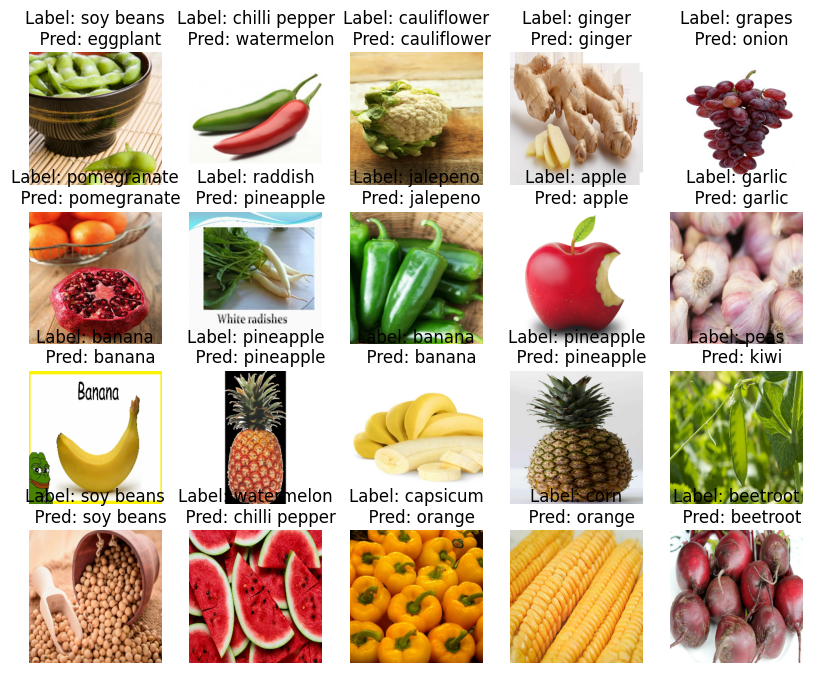

In [20]:
plt.figure(figsize=(10, 10))


#Iterate available images


for i in range(image_batch.shape[0]):
  ax = plt.subplot(5, 5, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i] # Get predicted label index
  plt.title( "Label: " + class_names[label] + "\n  Pred: " + class_names[np.argmax(score_batch[i])])
  plt.axis("off")